In [1]:
cd C:\2017\Work\Python\Kaggle\WSDM

C:\2017\Work\Python\Kaggle\WSDM


In [2]:
import pandas as pd

train_tran1 = pd.read_csv("train_lin_rand_xgb1.csv")
test_tran1 = pd.read_csv("test_lin_rand_xgb1.csv")

In [32]:
len(train_tran1.columns)

29

In [13]:
import pandas as pd
train_tran_mem_user = pd.read_csv("train_tran_mem_user.csv")
test_tran_mem_user = pd.read_csv("test_tran_mem_user.csv")


train_tran1 = train_tran_mem_user.drop_duplicates(keep="first", subset = ["msno"])# dropped duplicated column from transaction
test_tran1 = test_tran_mem_user.drop_duplicates(keep="first", subset = ["msno"])
train_tran1.reset_index(inplace=False)
test_tran1.reset_index(inplace=False)

train_tran1['gender'] = train_tran1['gender'].map({'female': 2, 'male': 1})
test_tran1['gender'] = test_tran1['gender'].map({'female': 2, 'male': 1})

train_tran1 = train_tran1.fillna(0)
test_tran1 = test_tran1.fillna(0)

#train_tran1.loc[train_tran1['bd'] < 0, 'bd'] = 0
#train_tran1.loc[train_tran1['bd'] > 80, 'bd'] = 0

#test_tran1.loc[test_tran1['bd'] < 0, 'bd'] = 0
#test_tran1.loc[test_tran1['bd'] > 80, 'bd'] = 0


train_tran1["discount"]= [int(i) for i in (train_tran1["plan_list_price"] - train_tran1["actual_amount_paid"])]
train_tran1.loc[train_tran1['discount'] < 0, 'discount'] = 0
test_tran1["discount"]= [int(i) for i in (test_tran1["plan_list_price"] - test_tran1["actual_amount_paid"])]
test_tran1.loc[test_tran1['discount'] < 0, 'discount'] = 0

In [3]:
#Import libraries:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import model_selection, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search


C:\Users\anike\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\anike\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [14]:
dummy_city = pd.get_dummies(train_tran1["city"], prefix="city")
train_tran1 = pd.concat([train_tran1, dummy_city], axis=1)

dummy_city1 = pd.get_dummies(test_tran1["city"], prefix="city")
test_tran1 = pd.concat([test_tran1, dummy_city1], axis=1)

dummy_regvia = pd.get_dummies(train_tran1["registered_via"], prefix="regv")
train_tran1 = pd.concat([train_tran1, dummy_regvia], axis=1)

dummy_regvia1 = pd.get_dummies(test_tran1["registered_via"], prefix="regv")
test_tran1 = pd.concat([test_tran1, dummy_regvia1], axis=1)

In [41]:
train_tran1['is_discount'] = train_tran1.discount.apply(lambda x: 1 if x > 0 else 0)

In [15]:
import numpy as np
train_tran1['is_discount'] = train_tran1.discount.apply(lambda x: 1 if x > 0 else 0)
test_tran1['is_discount'] = test_tran1.discount.apply(lambda x: 1 if x > 0 else 0)
test_tran1['autorenew_&_not_cancel'] = ((test_tran1.is_auto_renew == 1) == (test_tran1.is_cancel == 0)).astype(np.int8)
train_tran1['autorenew_&_not_cancel'] = ((train_tran1.is_auto_renew == 1) == (train_tran1.is_cancel == 0)).astype(np.int8)
train_tran1['notAutorenew_&_cancel'] = ((train_tran1.is_auto_renew == 0) == (train_tran1.is_cancel == 1)).astype(np.int8)
test_tran1['notAutorenew_&_cancel'] = ((test_tran1.is_auto_renew == 0) == (test_tran1.is_cancel == 1)).astype(np.int8)

In [42]:
test_tran1['is_discount'] = test_tran1.discount.apply(lambda x: 1 if x > 0 else 0)

In [43]:
test_tran1['autorenew_&_not_cancel'] = ((test_tran1.is_auto_renew == 1) == (test_tran1.is_cancel == 0)).astype(np.int8)
train_tran1['autorenew_&_not_cancel'] = ((train_tran1.is_auto_renew == 1) == (train_tran1.is_cancel == 0)).astype(np.int8)

In [44]:
train_tran1['notAutorenew_&_cancel'] = ((train_tran1.is_auto_renew == 0) == (train_tran1.is_cancel == 1)).astype(np.int8)
test_tran1['notAutorenew_&_cancel'] = ((test_tran1.is_auto_renew == 0) == (test_tran1.is_cancel == 1)).astype(np.int8)

In [30]:
def process_age(df,cut_points,label_names):
    df["bd"] = df["bd"].fillna(-0.5)
    df["bd_categories"] = pd.cut(df["bd"],cut_points,labels=label_names)
    return df

cut_points = [-4000,0,18,30,50,3000]
label_names = ["Missing","Child","Young","Adult","Older"]

train_tran1 = process_age(train_tran1,cut_points,label_names)
test_tran1 = process_age(test_tran1,cut_points,label_names)

dummy_bd = pd.get_dummies(train_tran1["bd_categories"], prefix="bdc")
train_tran1 = pd.concat([train_tran1, dummy_bd], axis=1)

dummy_bd = pd.get_dummies(test_tran1["bd_categories"], prefix="bdc")
test_tran1 = pd.concat([test_tran1, dummy_bd], axis=1)

In [22]:
Membership = []

for i in test_tran1["Membership_se_days"]:
    if i <= 0:
        i=0.5
    Membership.append(i)
    
test_tran1["Member"] = Membership

import numpy as np
Membership = []
for i in test_tran1["Member"]:
    try:
        i = np.log(i)
    except ValueError:
        i = 0
    Membership.append(i)
    
test_tran1["Member"] = Membership  

In [31]:
train_tran1['bd'].describe()
train_tran1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 970960 entries, 0 to 970959
Data columns (total 66 columns):
Unnamed: 0                970960 non-null int64
msno                      970960 non-null object
is_churn                  970960 non-null int64
payment_method_id         970960 non-null float64
payment_plan_days         970960 non-null float64
plan_list_price           970960 non-null float64
actual_amount_paid        970960 non-null float64
is_auto_renew             970960 non-null float64
transaction_date          970960 non-null float64
membership_expire_date    970960 non-null float64
is_cancel                 970960 non-null float64
transact_conv_date        970960 non-null object
transact_mem_exp_date     970960 non-null object
Membership_se_days        970960 non-null float64
city                      970960 non-null float64
bd                        970960 non-null float64
gender                    970960 non-null float64
registered_via            970960 non-null floa

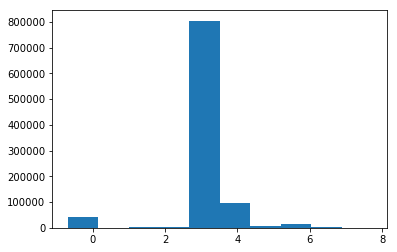

In [21]:
import matplotlib.pyplot as plt 
plt.hist(train_tran1["Member"])
plt.show()

In [20]:
import numpy as np
Membership = []
for i in train_tran1["Member"]:
    try:
        i = np.log(i)
    except ValueError:
        i = 0
    Membership.append(i)
    
train_tran1["Member"] = Membership   

In [23]:
predictors = ['payment_method_id', 'payment_plan_days', 'plan_list_price', 'actual_amount_paid', 'bd','gender','registration_init_time','date_count', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq', 'total_secs',
 'discount', 'is_auto_renew','is_cancel','autorenew_&_not_cancel','notAutorenew_&_cancel','city_0.0', 'city_1.0', 'city_3.0', 'city_4.0', 'city_5.0', 'city_6.0', 'city_7.0', 'city_8.0', 'city_9.0', 'city_10.0',
 'city_11.0', 'city_12.0', 'city_13.0', 'city_14.0', 'city_15.0', 'city_16.0', 'city_17.0', 'city_18.0', 'city_19.0', 'city_20.0',
 'city_21.0', 'city_22.0', 'regv_0.0', 'regv_3.0', 'regv_4.0', 'regv_7.0', 'regv_9.0', 'regv_13.0',"bag_sci_col",'lin_reg_predict','xgboost_cls_predict' ,"dec_sci_col"]

In [32]:
predictors = ['payment_method_id', 'payment_plan_days', 'plan_list_price', 'actual_amount_paid', 'bdc_Adult','bdc_Child',
              'bdc_Missing','bdc_Older','bdc_Young','gender','date_count', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq', 'total_secs',
 'discount', 'is_discount','is_auto_renew','is_cancel','city_0.0', 'city_1.0', 'city_3.0', 'city_4.0', 'city_5.0', 'city_6.0', 'city_7.0', 'city_8.0', 'city_9.0', 'city_10.0',
 'city_11.0', 'city_12.0', 'city_13.0', 'city_14.0', 'city_15.0', 'city_16.0', 'city_17.0', 'city_18.0', 'city_19.0', 'city_20.0',
 'city_21.0', 'city_22.0', 'regv_0.0', 'regv_3.0', 'regv_4.0', 'regv_7.0', 'regv_9.0', 'regv_13.0']

In [85]:
predictors = ['payment_method_id', 'payment_plan_days', 'plan_list_price', 'actual_amount_paid', 'bd','gender','registration_init_time','date_count', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq', 'total_secs',
 'discount', 'is_discount','is_auto_renew','is_cancel','city_0.0', 'city_1.0', 'city_3.0', 'city_4.0', 'city_5.0', 'city_6.0', 'city_7.0', 'city_8.0', 'city_9.0', 'city_10.0',
 'city_11.0', 'city_12.0', 'city_13.0', 'city_14.0', 'city_15.0', 'city_16.0', 'city_17.0', 'city_18.0', 'city_19.0', 'city_20.0',
 'city_21.0', 'city_22.0', 'regv_0.0', 'regv_3.0', 'regv_4.0', 'regv_7.0', 'regv_9.0', 'regv_13.0', 'log_reg_predict2', 'rand_cls_predict2']

In [4]:
predictors = ['regv_13.0',"bag_sci_col","rand_sci_col",'lr_sci_col' ,"dec_sci_col"]

In [ ]:
test_tran1.info()

In [ ]:
train_tran1.info()

In [ ]:
predictors.remove("registered_via")

In [33]:
import sklearn.utils
train_random = sklearn.utils.shuffle(train_tran1)
#print('\n\ntrain_random: {0}'.format(train_random))
train_data = train_random.reset_index(drop=True)

In [ ]:
train = train_data[0:50000]

In [ ]:
param_test1 = {'n_estimators':list(range(90,150,10))}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train["is_churn"])

In [ ]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_


In [ ]:
param_test2 = {'max_depth':list(range(5,16,2)), 'min_samples_split':list(range(200,1001,200))}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train[predictors],train["is_churn"])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

In [34]:
train = train_data[1:600000]
test = train_data[600001:]

In [39]:
cols = predictors

train = train_data
test = test_tran1



import sys
import gc; gc.enable()
import collections
import xgboost as xgb
import pandas as pd
import numpy as np
import sklearn

In [ ]:
def xgb_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'log_loss', sklearn.metrics.log_loss(labels, preds)

fold = 1
for i in range(fold):
    params = {
        'eta': 0.02, #use 0.002
        'max_depth': 6,
        'subsample': 0.5,
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'seed': i,
        'silent': True
    }
    x1, x2, y1, y2 = sklearn.model_selection.train_test_split(train[cols], train['is_churn'], test_size=0.3, random_state=i)
    watchlist = [(xgb.DMatrix(x1, y1), 'train'), (xgb.DMatrix(x2, y2), 'valid')]
    model = xgb.train(params, xgb.DMatrix(x1, y1), 2000,  watchlist, feval=xgb_score, maximize=False, verbose_eval=50, early_stopping_rounds=50) #use 1500
    if i != 0:
        pred += model.predict(xgb.DMatrix(test[cols]), ntree_limit=model.best_ntree_limit)
    else:
        pred = model.predict(xgb.DMatrix(test[cols]), ntree_limit=model.best_ntree_limit)
pred /= fold
test_predictions = pred.clip(0.0000001, 0.999999)

[0]	train-logloss:0.67637	valid-logloss:0.676376	train-log_loss:0.67637	valid-log_loss:0.676376
Multiple eval metrics have been passed: 'valid-log_loss' will be used for early stopping.

Will train until valid-log_loss hasn't improved in 50 rounds.
[50]	train-logloss:0.271666	valid-logloss:0.27144	train-log_loss:0.271666	valid-log_loss:0.27144
[100]	train-logloss:0.167888	valid-logloss:0.167633	train-log_loss:0.167888	valid-log_loss:0.167633


In [24]:
min(test_predictions)

0.0095338169

In [25]:
max(test_predictions)

0.97438937

In [18]:
from sklearn.metrics import mean_squared_error
#train_mse = mean_squared_error(train_predictions, train['is_churn'])
test_mse = mean_squared_error(test_predictions, test['is_churn'])
import numpy as np
#train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
#print(train_rmse)
print(test_rmse)

0.184437442281


In [26]:
submission = pd.DataFrame({
    "is_churn": test_predictions,
        "msno": test_tran1["msno"]        
    })

submission.to_csv("sample_submission_new82.csv", index=False)

In [ ]:
XGboost classifier model - Base model 3

In [ ]:
def xgb_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'log_loss', sklearn.metrics.log_loss(labels, preds)

fold = 1
for i in range(fold):
    params = {
        'eta': 0.002, #use 0.002
        'max_depth': 6,
        'subsample': 0.8,
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'seed': i,
        'silent': True
    }
    x1, x2, y1, y2 = sklearn.model_selection.train_test_split(train[cols], train['is_churn'], test_size=0.3, random_state=i)
    watchlist = [(xgb.DMatrix(x1, y1), 'train'), (xgb.DMatrix(x2, y2), 'valid')]
    model = xgb.train(params, xgb.DMatrix(x1, y1), 2000,  watchlist, feval=xgb_score, maximize=False, verbose_eval=50, early_stopping_rounds=50) #use 1500
    if i != 0:
        pred += model.predict(xgb.DMatrix(test[cols]), ntree_limit=model.best_ntree_limit)
    else:
        pred = model.predict(xgb.DMatrix(test[cols]), ntree_limit=model.best_ntree_limit)
pred /= fold
test_predictions = pred.clip(0.0000001, 0.999999)

Linear regression model - first base model

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_tran1[predictors], train_tran1['is_churn'])
from sklearn.metrics import mean_squared_error
train_predictions1 = lr.predict(train_tran1[predictors])
train_predictions1 = train_predictions1.clip(0.0000001, 0.999999)
test_predictions1 = lr.predict(test_tran1[predictors])
test_predictions1 = test_predictions1.clip(0.0000001, 0.999999)

In [63]:
train_tran1["log_reg_predict"] = train_predictions
test_tran1["log_reg_predict"] = test_predictions

In [81]:
train_pred = []

for i in train_tran1["rand_cls_predict"]:
    if i > 0.4:
        i=1
    else:
        i=0
    train_pred.append(i)
    
train_tran1["rand_cls_predict2"] = train_pred
test_pred = []

for i in test_tran1["rand_cls_predict"]:
    if i > 0.4:
        i=1
    else:
        i=0
    test_pred.append(i)
    
test_tran1["rand_cls_predict2"] = test_pred

In [105]:
submission = pd.DataFrame({
    "is_churn": test_predictions,
        "msno": test_tran1["msno"]        
    })

submission.to_csv("sample_submission_new67.csv", index=False)

In [19]:
test_tran1["xgboost_cls_predict"] = test_predictions

In [25]:
train_tran1["xgboost_cls_predict"] = test_predictions

Random forest classifier on wsdm data - Base model 2

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

clf = RandomForestClassifier(n_estimators=150, random_state=1, min_samples_leaf=2)

clf.fit(train_tran1[predictors], train_tran1["is_churn"])

#predictions = clf.predict_proba(train_tran1[predictors])[:,1]
predictions1 = clf.predict_proba(test_tran1[predictors])[:,1]
#print(roc_auc_score(train_tran1["is_churn"], predictions))

In [32]:
#train_tran1["rand_cls_predict"] = predictions
test_tran1["rand_cls_predict"] = predictions1

In [52]:
train_tran1.pivot_table(index = "is_churn", values="log_response")

,log_response2
is_churn,
0,0.089868
1,0.090784


In [111]:
test_predictions = test["lin_reg_predict"] + test["xgboost_reg_predict"]

In [112]:
test_predictions = test_predictions/2

In [28]:
train_tran1.to_csv("train_lin_rand_xgb1.csv", index=False)
test_tran1.to_csv("test_lin_rand_xgb1.csv", index=False)

Meta-Logistic regression model with base linear, random, xgboost models

In [10]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(train[predictors], train["is_churn"])
train_predictions = logistic_model.predict_proba(train[predictors])[:,1]
test_predictions = logistic_model.predict_proba(test[predictors])[:,1]

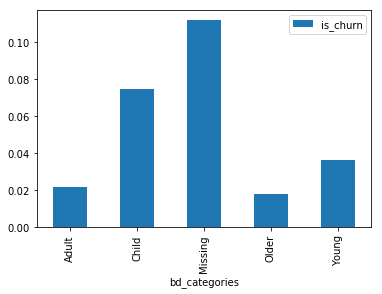

In [38]:
import matplotlib.pyplot as plt
age_pivot = train_tran1.pivot_table(index="bd_categories", values="is_churn")
age_pivot.plot.bar()
plt.show()

In [37]:
from sklearn.metrics import log_loss
#print(log_loss(train['is_churn'],train_predictions))
print(log_loss(test['is_churn'], test_predictions))

0.123618931353


In [160]:
test_tran1["log_response2"] = test_predictions

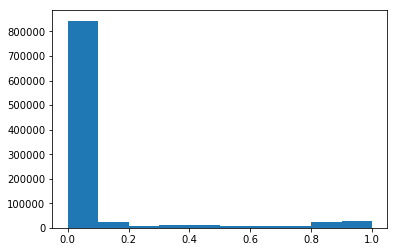

In [80]:
import matplotlib.pyplot as plt 
plt.hist(train_tran1["rand_cls_predict"])
plt.show()

In [147]:
train_predictions = (train['lin_reg_predict'] + train['rand_cls_predict'] + train['xgboost_cls_predict'] + train['log_response'])/4
test_predictions =(test['lin_reg_predict'] + test['rand_cls_predict'] + test['xgboost_cls_predict'] + test['log_response'])/4

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [6]:
df_x = train_tran1[predictors]
df_y = train_tran1['is_churn']

In [7]:
x_train,x_test,y_train, y_test = train_test_split(df_x,df_y, test_size=0.3, random_state= 4)

In [8]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [9]:
dt.score(x_test,y_test)

0.93348507319216723

In [11]:
train_tran1["dec_sci_col"] = dt.predict_proba(train_tran1[predictors])[:,1]
test_tran1["dec_sci_col"] = dt.predict_proba(test_tran1[predictors])[:,1]

In [26]:
rf = RandomForestClassifier(n_estimators=200)
#rf.fit(x_train, y_train)
rf.fit(train[predictors], train['is_churn'])
train_predictions = rf.predict_proba(train[predictors])[:,1]
test_predictions = rf.predict_proba(test[predictors])[:,1]

In [11]:
rf.score(x_test,y_test)

0.93348164016368684

In [12]:
rf.score(x_train,y_train)

0.99636000894549137

In [13]:
train_tran1["rand_sci_col"] = rf.predict_proba(train_tran1[predictors])[:,1]
test_tran1["rand_sci_col"] = rf.predict_proba(test_tran1[predictors])[:,1]

In [14]:
bg = BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=1.0, n_estimators =20)
bg.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.5, n_estimators=20, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [17]:
bg.score(x_test, y_test)

0.95566587020405924

In [15]:
train_tran1["bag_sci_col"] = bg.predict_proba(train_tran1[predictors])[:,1]
test_tran1["bag_sci_col"] = bg.predict_proba(test_tran1[predictors])[:,1]

In [25]:
adb = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators = 10, learning_rate = 0.001)
adb.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=0.001, n_estimators=10, random_state=None)

In [26]:
adb.score(x_test, y_test)

0.93526681497349706

In [16]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
svm = SVC(kernel = 'poly', degree = 2)

In [9]:
evc = VotingClassifier(estimators=[('lr', lr), ('dt', dt), ('svm', svm)], voting = 'hard')

In [ ]:
evc.fit(x_train.iloc[1:1000], y_train[1:1000])

In [17]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
lr.score(x_test, y_test)

0.91027436763615388

In [25]:
lr.score(x_train, y_train)

0.90996539507291752

In [18]:
train_tran1["lr_sci_col"] = lr.predict_proba(train_tran1[predictors])[:,1]
test_tran1["lr_sci_col"] = lr.predict_proba(test_tran1[predictors])[:,1]

In [26]:
test_predictions = (test_tran1["bag_sci_col"] + test_tran1["rand_sci_col"]+ test_tran1["lr_sci_col"] + test_predictions + test_tran1["dec_sci_col"])/5

In [36]:
min(test_predictions)

5.6390485258789816e-06

In [1]:
max(test_predictions)

NameError: name 'test_predictions' is not defined